In [1]:
# Predictive Model for base ball coaches (Python)

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import re # regular expression for string operations
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# read in coaches8.csv and  create data frame
coaches = pd.read_csv("Coaches8.csv")


# Remove '$' and ',' from the dataframe

for column in coaches.columns:
    coaches[column]=[x.strip('$') for x in coaches[column]]
    coaches[column]=coaches[column].apply(lambda x: re.sub(",", "", x))
    coaches[column]=coaches[column].apply(lambda x: re.sub("-","0", x))

        
    if column in ['SchoolPay','TotalPay','Bonus','AssistantPay','Buyout']:
         coaches[column]=pd.to_numeric(coaches[column], errors='coerce')
            
coaches.head(10)

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,00,0,0
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000
3,Alabama at Birmingham,C0USA,Bill Clark,900000,900000,950000,165471,0,3847500
4,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000,145000,0,2160417
5,Arizona,Pac012,Kevin Sumlin,1600000,2000000,2025000,00,0,10000000
6,Arizona State,Pac012,Herm Edwards,2000000,2000000,3010000,00,0,8166667
7,Arkansas,SEC,Chad Morris,3500000,3500000,1000000,00,0,12500000
8,Arkansas State,Sun Belt,Blake Anderson,825000,825000,185000,25000,0,300000
9,Army,Ind.,Jeff Monken,932521,932521,0,00,0,0


In [2]:
# check the number of records by conference
pd.unique(coaches['Conference'])

conference_cnt=pd.DataFrame(coaches.groupby('Conference').count()['School'])
conference_cnt['Conference']=conference_cnt.index
conference_cnt=conference_cnt.merge(pd.DataFrame(coaches.groupby('Conference')['School'].apply(list)),left_index =True,right_index=True)
conference_cnt.columns=['count','conference','schools']
conference_cnt

,count,conference,schools
Conference,,,
AAC,12,AAC,"[Central Florida, Cincinnati, Connecticut, Eas..."
ACC,14,ACC,"[Boston College, Clemson, Duke, Florida State,..."
Big 12,10,Big 12,"[Baylor, Iowa State, Kansas, Kansas State, Okl..."
Big Ten,14,Big Ten,"[Illinois, Indiana, Iowa, Maryland, Michigan, ..."
C0USA,14,C0USA,"[Alabama at Birmingham, Charlotte, Florida Atl..."
Ind.,6,Ind.,"[Army, Brigham Young, Liberty, Massachusetts, ..."
MAC,12,MAC,"[Akron, Ball State, Bowling Green, Buffalo, Ce..."
Mt. West,12,Mt. West,"[Air Force, Boise State, Colorado State, Fresn..."
Pac012,12,Pac012,"[Arizona, Arizona State, California, Colorado,..."


In [3]:
filtered_coaches = coaches[(coaches['TotalPay']==0) | (coaches['Bonus']==0)]
print(filtered_coaches)
fconference_cnt=pd.DataFrame(filtered_coaches.groupby('Conference').count()['School'])
fconference_cnt['Conference']=fconference_cnt.index
fconference_cnt=fconference_cnt.merge(pd.DataFrame(filtered_coaches.groupby('Conference')['School'].apply(list)),left_index =True,right_index=True)
fconference_cnt.columns=['count','conference','schools']
fconference_cnt

                  School Conference              Coach  SchoolPay  TotalPay  \
9                   Army       Ind.        Jeff Monken     932521    932521   
12                Baylor     Big 12         Matt Rhule          0         0   
14        Boston College        ACC      Steve Addazio    2514859   2514859   
16         Brigham Young       Ind.      Kalani Sitake          0         0   
28                  Duke        ACC    David Cutcliffe    2540928   2540928   
50               Liberty       Ind.        Turner Gill     947281    947281   
60          Miami (Fla.)        ACC         Mark Richt    4058061   4058061   
69                  Navy        AAC    Ken Niumatalolo    2163000   2163000   
79          Northwestern    Big Ten     Pat Fitzgerald    3619775   3619775   
80            Notre Dame       Ind.        Brian Kelly    2129638   2129638   
89            Pittsburgh        ACC       Pat Narduzzi    3017718   3017718   
91                  Rice      C0USA     Mike Bloomgr

,count,conference,schools
Conference,,,
AAC,5,AAC,"[Navy, Southern Methodist, Temple, Tulane, Tulsa]"
ACC,6,ACC,"[Boston College, Duke, Miami (Fla.), Pittsburg..."
Big 12,2,Big 12,"[Baylor, Texas Christian]"
Big Ten,2,Big Ten,"[Northwestern, Wisconsin]"
C0USA,1,C0USA,[Rice]
Ind.,4,Ind.,"[Army, Brigham Young, Liberty, Notre Dame]"
Pac012,2,Pac012,"[Southern California, Stanford]"
SEC,1,SEC,[Vanderbilt]


In [390]:
# Schools to drop due to the non availability of the data
coaches[(coaches['TotalPay']==0) ]

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,capacity_raw_data,capacity
12,Baylor,Big 12,Matt Rhule,0,0,0,00,0,0,https://www.wacotrib.com/sports/brice-cherry-b...,"[capacity of 10627, capacity of 16734, 7 lines...",16734
16,Brigham Young,Ind.,Kalani Sitake,0,0,0,00,0,0,https://en.wikipedia.org/wiki/LaVell_Edwards_S...,"[capacity to 45000, capacity to 64045, 0 lines...",64045
91,Rice,C0USA,Mike Bloomgren,0,0,0,00,0,0,https://en.wikipedia.org/wiki/Rice_Stadium_(Ri...,"[capacity of less than 37000, capacity which i...",37000
99,Southern Methodist,AAC,Sonny Dykes,0,0,0,00,0,0,https://www.smu.edu/Events/Venues/FordStadium,"[capacity of 32000, 0 lines contains count out...",32000
103,Temple,AAC,Geoff Collins,0,0,0,00,0,0,https://en.wikipedia.org/wiki/Temple_Stadium,"[capacity to 34200, 0 lines contains count out...",34200


In [391]:
# Schools to drop since the predictor variable is in negative salary = TotalPay - Bonus
coaches[(coaches['TotalPay']-coaches['Bonus'])<0 ]

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,capacity_raw_data,capacity
3,Alabama at Birmingham,C0USA,Bill Clark,900000,900000,950000,165471,0,3847500,https://en.wikipedia.org/wiki/Legion_Field,"[capacity to 54600, 2 lines contains count out...",54600
5,Arizona,Pac012,Kevin Sumlin,1600000,2000000,2025000,00,0,10000000,https://www.collegegridirons.com/stadiums/ariz...,"[capacity to 22671, 0 lines contains count out...",22671
6,Arizona State,Pac012,Herm Edwards,2000000,2000000,3010000,00,0,8166667,https://en.wikipedia.org/wiki/Sun_Devil_Stadium,"[capacity was 30000, capacity to the 55000, ca...",65870
24,Coastal Carolina,Sun Belt,Joe Moglia,400000,400000,800000,25000,0,516667,https://en.wikipedia.org/wiki/Brooks_Stadium,"[capacity to over 20000, 0 lines contains coun...",20000
32,Florida Atlantic,C0USA,Lane Kiffin,1000000,1000000,1150000,40000,0,2850000,https://www.collegegridirons.com/stadiums/fau-...,"[capacity of 30000, 0 lines contains count out...",30000
35,Fresno State,Mt. West,Jeff Tedford,1550000,1550000,2765000,1240000,0,5440000,https://en.wikipedia.org/wiki/Bulldog_Stadium,"[capacity of 30000, 0 lines contains count out...",30000
40,Hawaii,Mt. West,Nick Rolovich,425004,486504,1260000,0,0,300000,https://en.wikipedia.org/wiki/Aloha_Stadium,[capacity for this show was expanded from the ...,35000
46,Kansas,Big 12,David Beaty,1701109,1701109,2000000,0,0,3000000,https://en.wikipedia.org/wiki/David_Booth_Kans...,"[capacity is 50071, 1 lines contains count out...",50071
61,Miami (Ohio),MAC,Chuck Martin,524826,524826,582110,12669,0,522300,https://en.wikipedia.org/wiki/Yager_Stadium_(M...,"[capacity of 24286, 0 lines contains count out...",24286
100,Southern Mississippi,C0USA,Jay Hopson,500000,500000,870000,15000,0,1583333,https://americanfootball.fandom.com/wiki/Missi...,"[capacity of 21000, 0 lines contains count out...",21000


In [189]:
# Get additional data stadium capacity from relevant websites using webscrabbing
# Inherit and Modify HTMLParser class to get the relevant data from websites related to capacity
from html.parser import HTMLParser

class HTMLParser2(HTMLParser):
    import re
    
    def __init__(self):
        HTMLParser.__init__(self)
        self.counter=0
        self.capacity_min_limit=10000
        self.capacity_max_limit=200000
        self.struct_raw=[]
        self.struct_num=[]
        
    def feed(self,data):
        self.struct_raw=[]
        self.struct_num=[]
        self.counter=0
        HTMLParser.feed(self,data)
        self.struct_raw.append('{} lines contains count out of range ({},{})'.format(self.counter,self.capacity_min_limit,self.capacity_max_limit))
        #print(self.struct)
        return self.struct_raw,self.struct_num
        
    def handle_starttag(self, tag, attrs):
        if re.search('capacity',tag):
            print("Start tag: ", tag)
            for attr in attrs:
                print("attr:", attr)
    def handle_endtag(self, tag):
        if re.search('capacity',tag):
            print("End tag: ", tag)
    def handle_comment(self, data):
        if re.search('capacity',data):
            print("Comment: ", data)
    def handle_data(self, data):
        if re.search('capacity',data):
            try:
                m = re.search('(capacity)(\D+)(\d+)+', data.replace(',',''))
                if ((int(m.group(3))> self.capacity_min_limit) & (int(m.group(3))< self.capacity_max_limit)) :
                    self.struct_raw.append((m.group()))
                    self.struct_num.append(int(m.group(3)))
                    #print("Data: ", m.group())
                else:
                    self.counter+=1
            except:
                pass


    #def print_result(self):
        #print(self.struct,'\n','{} lines contains count out of range (10000,200000)'.format(self.counter))

parser = HTMLParser2()
x,y=parser.feed("<html><head><title>Coder</title></head><body><h1><!--hi-->Opening in 1962, the stadium cost $3.5 million. Named after the team, Falcon Stadium has a seating capacity of just over 52,000. On September 22, 1962 the Falcons beat Colorado Springs in the inaugural first game at the stadium.capacity of over 100,000 The lower grandstand encloses the playing field while the second and third decks are located on one side of the stadium.  The main scoreboard sits above the stands in the endzone. Falcon Stadium has changed very little over the years, but has hosted many memorable football games. Lighting was added in 2002 and a new videoboard in 2004.</h1></body></html>")
print(x,y)


['capacity of just over 52000', '0 lines contains count out of range (10000,200000)'] [52000]


In [232]:
# using google search to scan for relevant information for each shool stadium . select 10 results for each school and iterate 
# through the webpage untill we get the capacity information with the help of above HTMLParser class

from googlesearch import search
import urllib
from bs4 import BeautifulSoup
import re

#search(query, tld='com', lang='en', num=10, start=0, stop=None, pause=2.0)
# to search 
query_lst=[x+' school stadium capacity' for x in coaches['School']]

for index,query in enumerate(query_lst):
    #if index<10:
        for url in search(query, tld="com", num=10, stop=10, pause=2): 
            coaches.loc[index,'url']=url
            try:
                with urllib.request.urlopen(url) as request:
                    stadiums=request.read().decode('utf-8').replace('\0', '')
                    #print(stadiums)
                    raw_data=parser.feed(stadiums)
                    #print(type(raw_data))
                    if max(raw_data[1])>0:
                        coaches.at[index,'capacity_raw_data']=raw_data[0]
                        coaches.at[index,'capacity']=max(raw_data[1])
                        #print(url,raw_data[0],raw_data[1])
                        break
            except:
                try:
                    coaches.at[index,'capacity_raw_data']=('HTTPError on '+ url)
                except:
                    pass

In [233]:
# Now we have capacity for all the stadium but still missing some of them which are shown below

coaches_pending=coaches[[type(x)!=int for x in coaches['capacity']]]
coaches_pending.reset_index(level=0, inplace=True)
coaches_pending.head()

,index,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,capacity_raw_data,capacity
0,41,Houston,AAC,Major Applewhite,1750000,1750000,782500,20000,0,2112500,https://texasbob.com/stadium/stadium.php?id=512,HTTPError on https://texasbob.com/stadium/stad...,NaN
1,100,Southern Mississippi,C0USA,Jay Hopson,500000,500000,870000,15000,0,1583333,https://www.sunherald.com/sports/college/confe...,HTTPError on https://www.sunherald.com/sports/...,NaN


In [235]:
# Select 10 more websites and parse them to see if we are able to get the capacity information for the above missing ones
# Next 10 results is promising for the above missing 

query_lst=[x+' school stadium capacity' for x in coaches_pending['School']]

for index,query in enumerate(query_lst):
    #if index<2:
        for url in search(query, tld="com", num=10,start=11, stop=20, pause=2): 
            coaches_pending.at[index,'url']=url
            try:
                with urllib.request.urlopen(url) as request:
                    stadiums=request.read().decode('utf-8').replace('\0', '')
                    #print(stadiums)
                    raw_data=parser.feed(stadiums)
                    #print(type(raw_data))
                    if max(raw_data[1])>0:
                        coaches_pending.at[index,'capacity_raw_data']=raw_data[0]
                        coaches_pending.at[index,'capacity']=max(raw_data[1])
                        print(url,raw_data[0],raw_data[1])
                        break
            except:
                try:
                    coaches_pending.at[index,'capacity_raw_data']=('HTTPError on '+ url)
                except:
                    pass

https://www.houstonisd.org/Page/173191 ['capacity for football and track - 12000', '2 lines contains count out of range (10000,200000)'] [12000]
https://americanfootball.fandom.com/wiki/Mississippi_Veterans_Memorial_Stadium ['capacity of 21000', '0 lines contains count out of range (10000,200000)'] [21000]


In [236]:
# check the pending two items for capacity
coaches_pending.head()

,index,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,capacity_raw_data,capacity
0,41,Houston,AAC,Major Applewhite,1750000,1750000,782500,20000,0,2112500,https://www.houstonisd.org/Page/173191,"[capacity for football and track - 12000, 2 li...",12000
1,100,Southern Mississippi,C0USA,Jay Hopson,500000,500000,870000,15000,0,1583333,https://americanfootball.fandom.com/wiki/Missi...,"[capacity of 21000, 0 lines contains count out...",21000


In [240]:
coaches.loc[[41,100],]

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,capacity_raw_data,capacity
41,Houston,AAC,Major Applewhite,1750000,1750000,782500,20000,0,2112500,https://texasbob.com/stadium/stadium.php?id=512,HTTPError on https://texasbob.com/stadium/stad...,NaN
100,Southern Mississippi,C0USA,Jay Hopson,500000,500000,870000,15000,0,1583333,https://www.sunherald.com/sports/college/confe...,HTTPError on https://www.sunherald.com/sports/...,NaN


In [244]:
# save the parsed information in local in case if we want to rerun the model . webscrabbing takes longer and hence saving the results set to avoid running again

for ind,item in enumerate(coaches_pending['index']):
    coaches.at[item,'url']=coaches_pending.loc[ind,'url']
    coaches.at[item,'capacity_raw_data']=coaches_pending.loc[ind,'capacity_raw_data']
    coaches.at[item,'capacity']=coaches_pending.loc[ind,'capacity']
    
coaches.loc[[41,100],]

coaches.to_csv (r'coaches_clean.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [249]:
# predictor variable salary is calculated by doing a minus on totalpay and bonus
# Eliminate the records which has negative salary
coaches[(coaches['TotalPay']>0) & (coaches['Bonus']>0)].head(2)

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,capacity_raw_data,capacity
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,00,0,0,https://www.collegegridirons.com/stadiums/falc...,"[capacity of just over 52000, 0 lines contains...",52000
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,https://www.collegegridirons.com/stadiums/info...,"[capacity of 25000, 0 lines contains count out...",25000


In [326]:
type(coaches)
# using filter to remove the zero entries
# Take a peek on the filtered dataset 
filtered_coaches = coaches[(coaches['TotalPay']>0) & (coaches['Bonus']>0)]
fconference_cnt=pd.DataFrame(filtered_coaches.groupby('Conference').count()['School'])
fconference_cnt['Conference']=fconference_cnt.index
fconference_cnt=fconference_cnt.merge(pd.DataFrame(filtered_coaches.groupby('Conference')['School'].apply(list)),left_index =True,right_index=True)
fconference_cnt.columns=['count','conference','schools']
fconference_cnt

,count,conference,schools
Conference,,,
AAC,7,AAC,"[Central Florida, Cincinnati, Connecticut, Eas..."
ACC,8,ACC,"[Clemson, Florida State, Georgia Tech, Louisvi..."
Big 12,8,Big 12,"[Iowa State, Kansas, Kansas State, Oklahoma, O..."
Big Ten,12,Big Ten,"[Illinois, Indiana, Iowa, Maryland, Michigan, ..."
C0USA,13,C0USA,"[Alabama at Birmingham, Charlotte, Florida Atl..."
Ind.,2,Ind.,"[Massachusetts, New Mexico State]"
MAC,12,MAC,"[Akron, Ball State, Bowling Green, Buffalo, Ce..."
Mt. West,12,Mt. West,"[Air Force, Boise State, Colorado State, Fresn..."
Pac012,10,Pac012,"[Arizona, Arizona State, California, Colorado,..."


In [327]:
filtered_coaches.head(2)

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,capacity_raw_data,capacity
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,00,0,0,https://www.collegegridirons.com/stadiums/falc...,"[capacity of just over 52000, 0 lines contains...",52000
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,https://www.collegegridirons.com/stadiums/info...,"[capacity of 25000, 0 lines contains count out...",25000


In [328]:

# examine the structure of the data frame
print("\nContents of coaches data frame ---------------")
# Create predictor variable (salary) which is Total compensation minus bonus 
filtered_coaches['salary'] = filtered_coaches['TotalPay']-filtered_coaches['Bonus']

# Exclude Negative Salaries
filtered_coaches = filtered_coaches[filtered_coaches['salary']>0]

filtered_coaches.head(10)
filtered_coaches.describe()
#filtered_coaches['capacity'].describe()


Contents of coaches data frame ---------------


C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,SchoolPay,TotalPay,Bonus,AssistantPay,Buyout,salary
count,9.600000e+01,9.600000e+01,9.600000e+01,96.0,9.600000e+01,9.600000e+01
mean,2.524397e+06,2.528392e+06,8.060759e+05,0.0,8.578399e+06,1.722316e+06
std,2.028489e+06,2.035454e+06,5.729701e+05,0.0,1.091267e+07,1.763213e+06
min,3.900000e+05,3.900000e+05,5.000000e+04,0.0,0.000000e+00,3.400000e+04
25%,7.906425e+05,7.906425e+05,3.716250e+05,0.0,1.187500e+06,3.863550e+05
50%,1.865004e+06,1.865004e+06,7.250000e+05,0.0,4.134384e+06,9.385000e+05
75%,3.790938e+06,3.790938e+06,1.088750e+06,0.0,1.228672e+07,2.647000e+06
max,8.307000e+06,8.307000e+06,3.100000e+06,0.0,6.812500e+07,7.207000e+06


In [329]:
filtered_coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,capacity_raw_data,capacity,salary
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,00,0,0,https://www.collegegridirons.com/stadiums/falc...,"[capacity of just over 52000, 0 lines contains...",52000,638000
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,https://www.collegegridirons.com/stadiums/info...,"[capacity of 25000, 0 lines contains count out...",25000,187500
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,https://en.wikipedia.org/wiki/List_of_American...,"[capacity of 30000, 5 lines contains count out...",30000,7207000
4,Appalachian State,Sun Belt,Scott Satterfield,712500,712500,295000,145000,0,2160417,https://en.wikipedia.org/wiki/Kidd_Brewer_Stadium,"[capacity was expanded to 18000, 1 lines conta...",18000,417500
7,Arkansas,SEC,Chad Morris,3500000,3500000,1000000,00,0,12500000,https://en.wikipedia.org/wiki/War_Memorial_Sta...,"[capacity of 31075, 0 lines contains count out...",31075,2500000


In [333]:
# removing space and . from the conference variable
filtered_coaches['Conference']=[re.sub('\.','',(re.sub(' ','',x))) for x in list(filtered_coaches['Conference'])]

In [340]:
ordered_conf_names = ['MtWest', 'MAC', 'SEC', 'C0USA', 'SunBelt', 'Pac012', 'Ind','Big12','ACC','AAC','BigTen']

In [335]:
# create dummy variable for each conference 

for item in ordered_conf_names:
    filtered_coaches[item]=[int(x) for x in list(filtered_coaches['Conference_cln']==item)]

# convert capacity from continous to categorical variable 
filtered_coaches['capacity_bins']=pd.cut(filtered_coaches['capacity'],5)
filtered_coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,url,...,SEC,C0USA,SunBelt,Pac012,Ind,Big12,ACC,AAC,BigTen,capacity_bins
0,Air Force,MtWest,Troy Calhoun,885000,885000,247000,00,0,0,https://www.collegegridirons.com/stadiums/falc...,...,0,0,0,0,0,0,0,0,0,"(44600.0, 77200.0]"
1,Akron,MAC,Terry Bowden,411000,412500,225000,50000,0,688500,https://www.collegegridirons.com/stadiums/info...,...,0,0,0,0,0,0,0,0,0,"(11837.0, 44600.0]"
2,Alabama,SEC,Nick Saban,8307000,8307000,1100000,500000,0,33600000,https://en.wikipedia.org/wiki/List_of_American...,...,1,0,0,0,0,0,0,0,0,"(11837.0, 44600.0]"
4,Appalachian State,SunBelt,Scott Satterfield,712500,712500,295000,145000,0,2160417,https://en.wikipedia.org/wiki/Kidd_Brewer_Stadium,...,0,0,1,0,0,0,0,0,0,"(11837.0, 44600.0]"
7,Arkansas,SEC,Chad Morris,3500000,3500000,1000000,00,0,12500000,https://en.wikipedia.org/wiki/War_Memorial_Sta...,...,1,0,0,0,0,0,0,0,0,"(11837.0, 44600.0]"


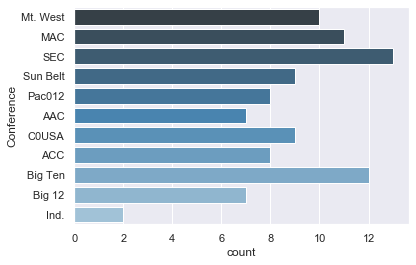

In [262]:
# countplot for conferences
sns.countplot(y="Conference", data=filtered_coaches, palette="Blues_d")
plt.show()


In [263]:
# Exploratory Analysis for each conference and oberserve them under box plots
MtWest = filtered_coaches[filtered_coaches['Conference'] == 'Mt. West']
MAC = filtered_coaches[filtered_coaches['Conference'] == 'MAC']
SEC = filtered_coaches[filtered_coaches['Conference'] == 'SEC']
C0USA = filtered_coaches[filtered_coaches['Conference'] == 'C0USA']
SunBelt = filtered_coaches[filtered_coaches['Conference'] == 'Sun Belt']
Pac012 = filtered_coaches[filtered_coaches['Conference'] == 'Pac012']
Ind = filtered_coaches[filtered_coaches['Conference'] == 'Ind.']
Big12 = filtered_coaches[filtered_coaches['Conference'] == 'Big 12']
ACC = filtered_coaches[filtered_coaches['Conference'] == 'ACC']
AAC = filtered_coaches[filtered_coaches['Conference'] == 'AAC']
BigTen = filtered_coaches[filtered_coaches['Conference'] == 'Big Ten']

# convert Pays by confernce into list of vectors for box plot
data_tp = [MtWest['TotalPay'], MAC['TotalPay'], 
    SEC['TotalPay'], C0USA['TotalPay'], 
    SunBelt['TotalPay'], Pac012['TotalPay'], 
    Ind['TotalPay'],Big12['TotalPay'],ACC['TotalPay'],AAC['TotalPay'],BigTen['TotalPay']]

data_sp = [MtWest['SchoolPay'], MAC['SchoolPay'], 
    SEC['SchoolPay'], C0USA['SchoolPay'], 
    SunBelt['SchoolPay'], Pac012['SchoolPay'], 
    Ind['SchoolPay'],Big12['SchoolPay'],ACC['SchoolPay'],AAC['SchoolPay'],BigTen['SchoolPay']]

data_bonus = [MtWest['Bonus'], MAC['Bonus'], 
    SEC['Bonus'], C0USA['Bonus'], 
    SunBelt['Bonus'], Pac012['Bonus'], 
    Ind['Bonus'],Big12['Bonus'],ACC['Bonus'],AAC['Bonus'],BigTen['Bonus']]

data_buyout = [MtWest['Buyout'], MAC['Buyout'], 
    SEC['Buyout'], C0USA['Buyout'], 
    SunBelt['Buyout'], Pac012['Buyout'], 
    Ind['Buyout'],Big12['Buyout'],ACC['Buyout'],AAC['Buyout'],BigTen['Buyout']]



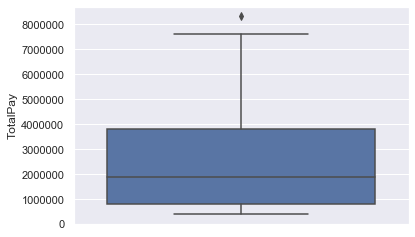

In [264]:
## SUMMARY STATISTICS
# boxplot on complete dataset
fig,ax=plt.subplots()
np.mean(filtered_coaches['TotalPay'])
sns.boxplot(y="TotalPay", data=filtered_coaches)
plt.show()

#fig=plt.figure(figsize=(12,5))
#sns.boxplot(x="Conference", y="TotalPay", data=coaches, color = "gray");
#plt.show()

#fig=plt.figure(figsize=(12,5))
#sns.boxplot(x="Conference", y="SchoolPay", data=coaches, color = "gray");
#plt.show()

#fig=plt.figure(figsize=(12,5))
#sns.boxplot(x="Conference", y="Bonus", data=coaches, color = "gray");
#plt.show()

#fig=plt.figure(figsize=(12,5))
#sns.boxplot(x="Conference", y="Buyout", data=coaches, color = "gray");
#plt.show()

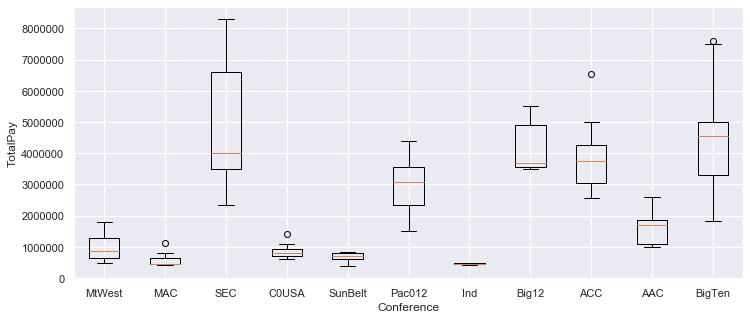

C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


<Figure size 432x288 with 0 Axes>

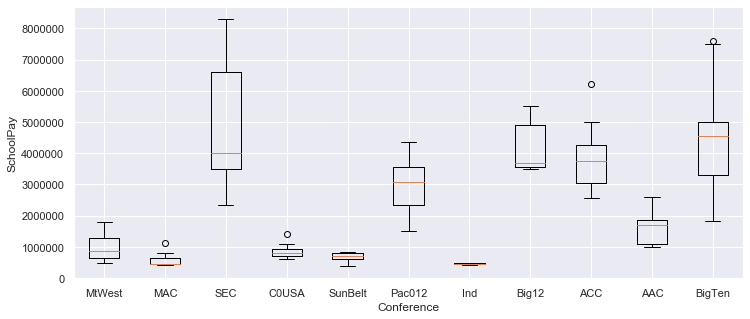

C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

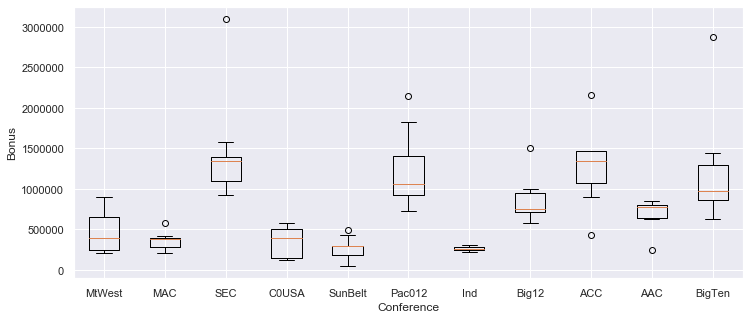

C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

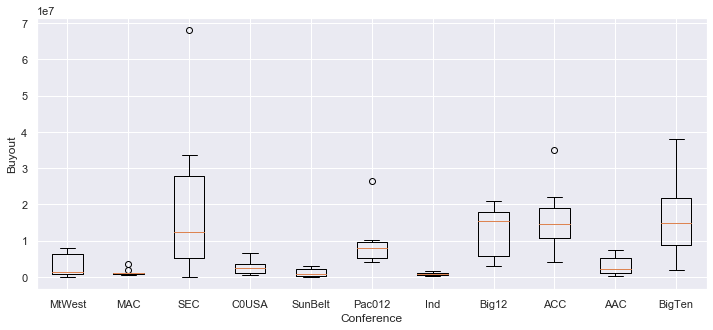

C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

In [265]:
# exploratory data analysis: box plot for conferences on Tolat pay, Bonus, School Pay and Buyout
fig, axis = plt.subplots(figsize=(12,5))
axis.set_xlabel('Conference')
axis.set_ylabel('TotalPay')
day_plot = plt.boxplot(data_tp, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_conf_names)
plt.show()
plt.savefig('total_pay_whiskers_by_conference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

fig, axis = plt.subplots(figsize=(12,5))
axis.set_xlabel('Conference')
axis.set_ylabel('SchoolPay')
day_plot = plt.boxplot(data_sp, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_conf_names)
plt.show()
plt.savefig('school_pay_whiskers_by_conference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

fig, axis = plt.subplots(figsize=(12,5))
axis.set_xlabel('Conference')
axis.set_ylabel('Bonus')
day_plot = plt.boxplot(data_bonus, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_conf_names)
plt.show()
plt.savefig('bonus_whiskers_by_conference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

fig, axis = plt.subplots(figsize=(12,5))
axis.set_xlabel('Conference')
axis.set_ylabel('Buyout')
day_plot = plt.boxplot(data_buyout, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_conf_names)
plt.show()
plt.savefig('buyout_whiskers_by_conference.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 


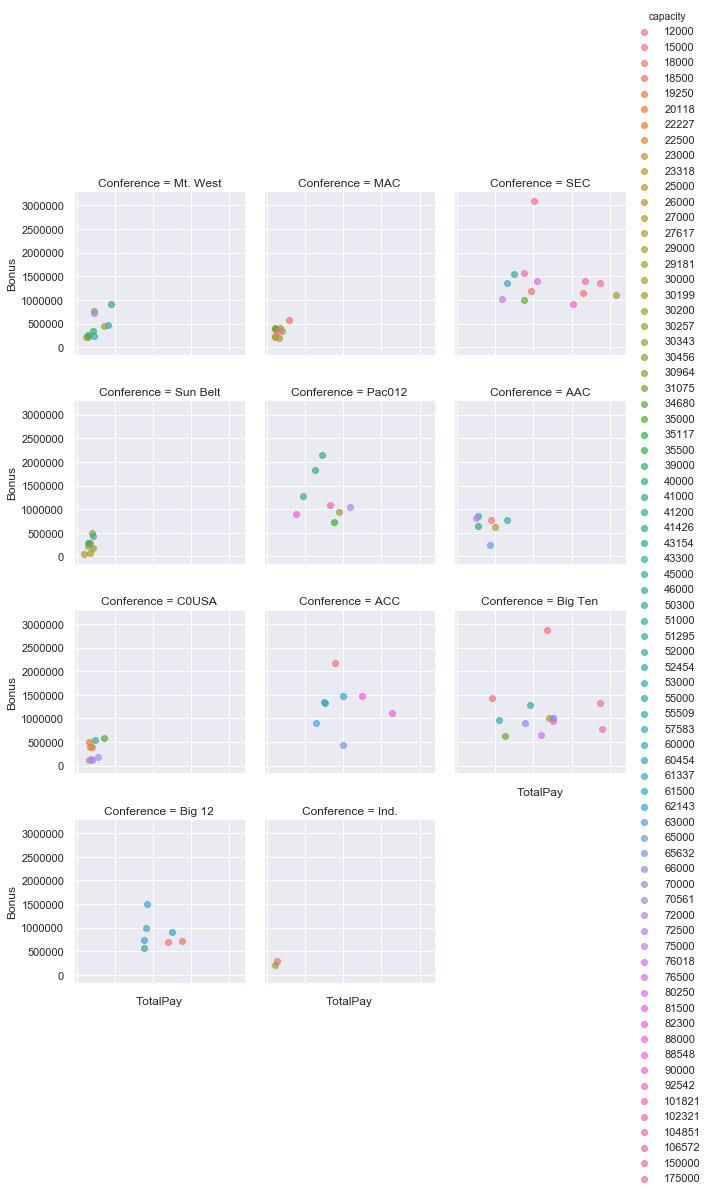

In [268]:
# scatter plot TotalPay and Bonus by conference and hue by capacity
import seaborn as sns

sns.set(style="darkgrid")
g = sns.FacetGrid(filtered_coaches, col="Conference", col_wrap=3,hue="capacity")
g.map(plt.scatter, "TotalPay", "Bonus", alpha=.7)
g.set_xticklabels(rotation=30)
g.add_legend();
plt.show()


In [343]:
ordered_conf_names

['MtWest',
 'MAC',
 'SEC',
 'C0USA',
 'SunBelt',
 'Pac012',
 'Ind',
 'Big12',
 'ACC',
 'AAC',
 'BigTen']

In [342]:
# create a clean data frame for modelling

variables= ordered_conf_names.copy()
variables.extend(['Buyout','capacity_bins','salary'])
variables
model_df=pd.DataFrame()

for item in variables:
    model_df[item]=filtered_coaches[item]

model_df.index=filtered_coaches['School']
model_df.head()

,MtWest,MAC,SEC,C0USA,SunBelt,Pac012,Ind,Big12,ACC,AAC,BigTen,Conference,Buyout,capacity_bins,salary
School,,,,,,,,,,,,,,,
Air Force,1,0,0,0,0,0,0,0,0,0,0,MtWest,0,"(44600.0, 77200.0]",638000
Akron,0,1,0,0,0,0,0,0,0,0,0,MAC,688500,"(11837.0, 44600.0]",187500
Alabama,0,0,1,0,0,0,0,0,0,0,0,SEC,33600000,"(11837.0, 44600.0]",7207000
Appalachian State,0,0,0,0,1,0,0,0,0,0,0,SunBelt,2160417,"(11837.0, 44600.0]",417500
Arkansas,0,0,1,0,0,0,0,0,0,0,0,SEC,12500000,"(11837.0, 44600.0]",2500000


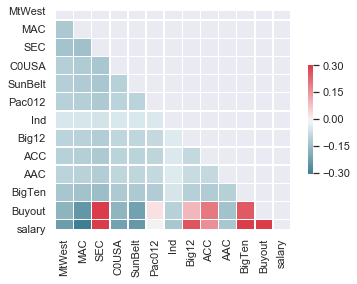

In [352]:
# Take a look at the correlations between all dependent variable

corr = model_df.corr()
#corr = model_df.loc[:, model_df.columns != 'runiform'].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [356]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
model_df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(model_df))
model_df_train = model_df[model_df['runiform'] >= 0.33]
model_df_test = model_df[model_df['runiform'] < 0.33]
# check training data frame
print('\nfiltered_coaches_train data frame (rows, columns): ',model_df_train.shape)
print(model_df_train.head())
# check test data frame
print('\nfiltered_coaches_test data frame (rows, columns): ',model_df_test.shape)
print(model_df_test.head())
 


filtered_coaches_train data frame (rows, columns):  (70, 16)
                   MtWest  MAC  SEC  C0USA  SunBelt  Pac012  Ind  Big12  ACC  \
School                                                                         
Akron                   0    1    0      0        0       0    0      0    0   
Alabama                 0    0    1      0        0       0    0      0    0   
Appalachian State       0    0    0      0        1       0    0      0    0   
Arkansas                0    0    1      0        0       0    0      0    0   
Ball State              0    1    0      0        0       0    0      0    0   

                   AAC  BigTen Conference    Buyout       capacity_bins  \
School                                                                    
Akron                0       0        MAC    688500  (11837.0, 44600.0]   
Alabama              0       0        SEC  33600000  (11837.0, 44600.0]   
Appalachian State    0       0    SunBelt   2160417  (11837.0, 44600.0]   
Ar

In [386]:
# specify a model with buyout, conference and additional_data (capacity_bins exptracted from relevant websites)
my_model = str('salary ~  Buyout + MtWest+ MAC+ SEC+C0USA+ SunBelt+ Pac012+ Ind+ Big12+ ACC+ AAC+ BigTen+ capacity_bins')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = model_df_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
model_df_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
model_df_test['predict_salary'] = train_model_fit.predict(model_df_test)


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     21.65
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           3.17e-17
Time:                        18:48:18   Log-Likelihood:                -1031.5
No. Observations:                  70   AIC:                             2091.
Df Residuals:                      56   BIC:                             2123.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [385]:
model_df_test.head()

,MtWest,MAC,SEC,C0USA,SunBelt,Pac012,Ind,Big12,ACC,AAC,BigTen,Conference,Buyout,capacity_bins,salary,runiform,predict_salary
School,,,,,,,,,,,,,,,,,
Air Force,1,0,0,0,0,0,0,0,0,0,0,MtWest,0,"(44600.0, 77200.0]",638000,0.191519,3.034735e+05
Arkansas State,0,0,0,0,1,0,0,0,0,0,0,SunBelt,300000,"(11837.0, 44600.0]",640000,0.272593,2.395066e+05
Auburn,0,0,1,0,0,0,0,0,0,0,0,SEC,32143750,"(77200.0, 109800.0]",5305656,0.276464,5.291148e+06
Colorado,0,0,0,0,0,1,0,0,0,0,0,Pac012,10314583,"(11837.0, 44600.0]",728500,0.013768,2.329606e+06
Florida,0,0,1,0,0,0,0,0,0,0,0,SEC,12000000,"(77200.0, 109800.0]",5145000,0.075381,2.460070e+06


In [380]:
pd.unique(model_df_train['capacity_bins'])[1]

Interval(44600.0, 77200.0, closed='right')

In [387]:
# Recommended salary for Syracuse University Football coach
model_df_syracuse=pd.DataFrame()
model_df_syracuse['MtWest']=[0]
model_df_syracuse['MAC']=0
model_df_syracuse['SEC']=0
model_df_syracuse['C0USA']=0
model_df_syracuse['SunBelt']=0
model_df_syracuse['Pac012']=0
model_df_syracuse['Ind']=0
model_df_syracuse['Big12']=0
model_df_syracuse['ACC']=1
model_df_syracuse['AAC']=0
model_df_syracuse['BigTen']=0
model_df_syracuse['Conference']='ACC'
model_df_syracuse['Buyout']=0
model_df_syracuse['capacity_bins']= pd.unique(model_df_train['capacity_bins'])[1]
model_df_syracuse['salary']= None
model_df_syracuse['runiform']= 0.11
model_df_syracuse['School']='Syracuse University'
model_df_syracuse.index=model_df_syracuse['School']
model_df_syracuse=model_df_syracuse.loc[:,model_df_syracuse.columns!='School']

# test set predictions from the model fit to the training set
model_df_syracuse['predict_salary'] = train_model_fit.predict(model_df_syracuse)

print('Predicted salary of Syracuse University Football coach is {}'.format(model_df_syracuse['predict_salary']))


Predicted salary of Syracuse University Football coach is School
Syracuse University    623875.607544
Name: predict_salary, dtype: float64


In [388]:
# What would his salary be if we went to the Big Ten? 
model_df_syracuse['ACC']=0
model_df_syracuse['BigTen']=1
model_df_syracuse['Conference']='BigTen'
# test set predictions from the model fit to the training set
model_df_syracuse['predict_salary'] = train_model_fit.predict(model_df_syracuse)

print('Predicted salary of Syracuse University Football coach is {}'.format(model_df_syracuse['predict_salary']))


Predicted salary of Syracuse University Football coach is School
Syracuse University    827853.754817
Name: predict_salary, dtype: float64


In [360]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(model_df_test['salary'].corr(model_df_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in

my_model_fit = smf.ols(my_model, data = model_df).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of stadium capacity_bin (44600.0, 77200.0] on salary: ',\
    round(my_model_fit.params[1],0))
print('\nEstimated Effect of stadium capacity_bin (77200.0, 109800.0] on salary: ',\
    round(my_model_fit.params[2],0))
print('\nEstimated Effect of stadium capacity_bin (109800.0, 142400.0] on salary: ',\
    round(my_model_fit.params[3],0))
print('\nEstimated Effect of stadium capacity_bin (142400.0, 175000.0] on salary: ',\
    round(my_model_fit.params[4],0))
    


Proportion of Test Set Variance Accounted for:  0.588
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     21.75
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           9.17e-22
Time:                        17:01:58   Log-Likelihood:                -1441.6
No. Observations:                  96   AIC:                             2913.
Df Residuals:                      81   BIC:                             2952.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [357]:
# specify a model without conference but with  additional_data (capacity_bins exptracted from relevant websites)
my_model = str('salary ~  Buyout + capacity_bins')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = model_df_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
model_df_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
model_df_test['predict_salary'] = train_model_fit.predict(model_df_test)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     72.07
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           8.65e-21
Time:                        17:00:28   Log-Likelihood:                -1043.6
No. Observations:                  70   AIC:                             2095.
Df Residuals:                      66   BIC:                             2104.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

C:\Users\yokil\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\yokil\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [358]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(model_df_test['salary'].corr(model_df_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in

my_model_fit = smf.ols(my_model, data = model_df).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of stadium capacity_bin (44600.0, 77200.0] on salary: ',\
    round(my_model_fit.params[1],0))
print('\nEstimated Effect of stadium capacity_bin (77200.0, 109800.0] on salary: ',\
    round(my_model_fit.params[2],0))
print('\nEstimated Effect of stadium capacity_bin (109800.0, 142400.0] on salary: ',\
    round(my_model_fit.params[3],0))
print('\nEstimated Effect of stadium capacity_bin (142400.0, 175000.0] on salary: ',\
    round(my_model_fit.params[4],0))
    


Proportion of Test Set Variance Accounted for:  0.555
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     53.10
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           5.27e-23
Time:                        17:01:29   Log-Likelihood:                -1458.6
No. Observations:                  96   AIC:                             2927.
Df Residuals:                      91   BIC:                             2940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------